#Laborator 4

In cadrul acestui laborator o sa lucram cu blocurile de baza necesare construirii unor retele mai complexe. De interes sunt:


*   Residual Blocks
*   Inception Blocks

Pe langa acestea, o sa aplicam si augmentari generale de date care au rolul de a face modelul robust la variatii mici. 



## Operatii Noi

Urmatoarele operatii vor fi folosite in cadrul laboratorului

Tensor shape: (batch,channels,dim1,dim2)


*  **torch.cat(tensors, dim=0).** Tensorii trebuie sa aiba aceleasi dim1,dim2, dar channels poate sa difere.
*  **torch.add(input, other)**. Tensorii trebuie sa aiba aceleasi dimensiune pe toate axele.





In [ ]:
import numpy as np
import torch.nn as nn
import torch

dummy_input_tensor1 = torch.rand((1,3,100,100))  # Input random de marime 100x100 cu 3 canale
dummy_input_tensor2 = torch.rand((1,5,100,100))  # Input random de marime 100x100 cu 5 canale

# Normal se concateneaza pe dimensiunea canalelor.
x = torch.cat([dummy_input_tensor1,dummy_input_tensor2],dim=1) 
print(x.shape) # Numarul de canele_output = canale_input2 + canale_input1

dummy_input_tensor1 = torch.rand((1,3,100,100))  # Input random de marime 100x100 cu 3 canale
dummy_input_tensor2 = torch.rand((1,3,100,100))  # Input random de marime 100x100 cu 3 canale

x = torch.add(dummy_input_tensor1,dummy_input_tensor2)
print(x.shape) 

torch.Size([1, 8, 10, 10, 10, 10, 10])
torch.Size([1, 3, 100, 100])


##Residual Block

In cadrul Resnet se utilizeaza residual connections / skip connections, care impreuna cu un path normal, ca cele implementate pana acum, formeaza un residual block. 

<img src="https://user-images.githubusercontent.com/6086781/28494249-97e81166-6ef6-11e7-88b8-fa4aa184bc0b.png" alt="Drawing" style="height: 400px;"/>


###Cerinta 1 - **(3p)**

Implementati ResidualBlock. Acesta duce input tensor din ($c_{input}$,width,height) in  ($c_{out}$,width,height) sau  ($c_{out}$,width/2,height/2) in functie de stride. (Puteti implemnta oricare dintre variantele din imagine)




In [ ]:
import numpy as np
import torch.nn as nn
import torch
import torch.nn.functional as F

class ResidualBlock(nn.Module):
  def __init__(self,input_channels=32,hidden_channels=64,output_channels=64,kernel_size=3,stride=1,activation=nn.ReLU()):
    super(ResidualBlock,self).__init__()
    layers = []

    # Your code here
    self.net_normal = nn.Sequential(*layers)

    self.net_residual = nn.Conv2d(input_channels,output_channels,1,stride)

  def forward(self,x):
    x = torch.add(self.net_normal(x),self.net_residual(x))
    x = F.relu(x)
    return x

block = ResidualBlock(3,64,128,3,2,nn.ReLU())
x = torch.rand(size=(1,3,100,100))

# Should output torch.Size([1, 128, 50, 50])
print(block(x).shape)

##Inception Block

In cadrul GoogleNet/InceptionNet este folosit Inception Block, care este alcatuit din mai multe mini-retele putin diferite, care se unesc la finalul Inception Block

### Cerinta 2 - **(3p)**

Implementati Inception Block. Acesta trebuie sa duca un Tensor ($ch_{input}$,w,h) in ($ch_{out}$,w/2,h/2)

Punctaj:
- cate **0.5p** pentru fiecare path implementat corect **(4 * 0.5p = 2p)**
- codul ruleaza si rezultatul final este corect (**1p**)


<!-- ![InceptionBlock](https://drive.google.com/uc?export=view&id=11eiInGoQoytm_N0989v5oJnKpFrspUzk) -->

<img src="https://drive.google.com/uc?export=view&id=11eiInGoQoytm_N0989v5oJnKpFrspUzk" alt="Drawing" style="height: 200px; width:200px;"/>

In [ ]:
import numpy as np
import torch.nn as nn
import torch
import torch.nn.functional as F


class InceptionBlock(nn.Module):
  def __init__(self,input_channels=32,kernel_size=3,stride=1,activation=nn.ReLU()):
    super(InceptionBlock,self).__init__()
    ## De sters
    layers = []
    # Your code here
    self.path1 = nn.Sequential(*layers)

    layers = []
    # Your code here
    self.path2 = nn.Sequential(*layers)

    layers = []
    # Your code here
    self.path3 = nn.Sequential(*layers)

    layers = []
    # Your code here
    self.path4 = nn.Sequential(*layers)

  def forward(self,x):
    x1 = self.path1(x)
    print(x1.shape)
    x2 =self.path2(x)
    print(x2.shape)
    x3 =self.path3(x)
    print(x3.shape)
    x4 =self.path4(x)
    print(x4.shape)
    x = torch.cat([x1,x2,x3,x4],1)
    return x

block = InceptionBlock(64,3,2,nn.ReLU())
x = torch.rand(size=(1,64,100,100))

# Should output torch.Size([1, 256, 50, 50])
print(block(x).shape)

## Instantierea seturilor de date

In acest laborator lucram cu un nou set de date. Este vorba de un dataset folosit in [aceasta competitie Kaggle](https://www.kaggle.com/c/dogs-vs-cats/overview), Pisici vs Caini. 

***In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.***


# Descarcarea setului de date

### Authenticating with Kaggle using kaggle.json

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle
!kaggle competitions download -c dogs-vs-cats
!for z in *.zip; do unzip "$z"; done
!ls 

## Crearea Dataloader-ului

In continuare, pentru a incarca date, sa o folosim un obiect mai complex, un Torch.utils.data.Dataset. Acesta are 3 functii importante:


*   __init__()
*   ____len____()
*  ____get_item____()



In [ ]:
import torch as t
from PIL import Image
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.functional import to_tensor, normalize
import random, os
random.seed(42)

import matplotlib.pyplot as plt
import matplotlib.patches as patches

train_dir = '../data/train'
test_dir = '../data/test'

class CatsDogsDataset(Dataset):
    def __init__(self, file_list, width=128, height=128, transform=None):
        self.file_list = file_list
        self.transform = transform
        self.img_size = (width, height)
        
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)

        original_width, original_height = img.size

        img = img.resize(self.img_size)
        img = np.array(img)
        
        label = img_path.split('/')[-1].split('.')[0]
        if label == 'dog':
            label = 1
        elif label == 'cat':
            label = 0
            
        return to_tensor(img), label

Construire Dataset si vizualizare date.

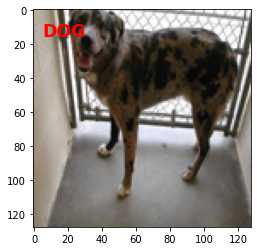

In [ ]:
from IPython.display import clear_output
import time

train_test_proportion = .85

import glob

samples = glob.glob(os.path.join('./train','*.jpg'))
random.shuffle(samples)

train_samples = samples[:int(train_test_proportion*len(samples))]
test_samples = samples[int(train_test_proportion*len(samples)):]

cats_dogs_train = CatsDogsDataset(train_samples)
cats_dogs_test = CatsDogsDataset(test_samples)

train_loader = DataLoader(cats_dogs_train, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(cats_dogs_test, batch_size=16, shuffle=False, num_workers=4)

see_examples = 10
for i, (imgs, label) in enumerate(train_loader):
    clear_output(wait=True)
    image = imgs[0].numpy().transpose(1, 2, 0)
    plt.imshow(image)
    plt.text(5, 15, "DOG" if label[0] else "CAT", fontsize ='xx-large', color='red', fontweight='bold')
    plt.show()

    if i >= see_examples - 1:
      break
    time.sleep(1)


### Cerinta 3 - **(4p)**

  1. Antrenati o retea convolutionala (o arhitectura la alegere din laboratorul 3) folosind acest dataset, pe GPU (https://pytorch.org/docs/stable/notes/cuda.html) **(1p)**
  2. Antrenati o retea de tip Resnet (folosind blocuri de tip Residual) **(1p)**
  3. Antrenati o retea de tip Inception (folosind blocuri de tip Inception)  **(1p)**
  4. Experimentati cu diferiti hyperparameters (numarul de layers, numarul de filtre/neuroni, etc.) **(1p)**
